In [36]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [37]:
X.shape

(3810, 7)

In [38]:
y.shape

(3810, 1)

In [39]:
X.iloc[:10,:]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320


In [40]:
y.iloc[:10,:]

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
5,Cammeo
6,Cammeo
7,Cammeo
8,Cammeo
9,Cammeo


In [41]:
X.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\GrowTech\AppData\Local\Temp\ipykernel_6584\1321750323.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


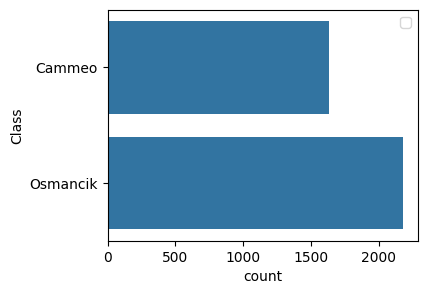

In [43]:
plt.figure(figsize=(4,3))
sns.countplot(y['Class'])
plt.legend()
plt.show()

In [44]:
y['Class'].value_counts().index

Index(['Osmancik', 'Cammeo'], dtype='object', name='Class')

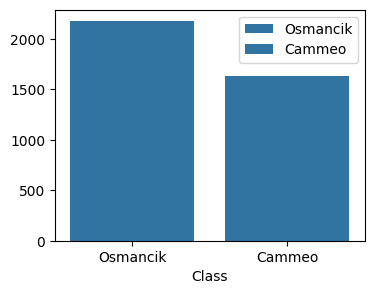

In [45]:
plt.figure(figsize=(4,3))
sns.barplot(x = y['Class'].value_counts().index,
            y = y['Class'].value_counts().values,
            label = y['Class'].value_counts().index,
            )
plt.show()

C:\Users\GrowTech\AppData\Local\Temp\ipykernel_6584\912611997.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


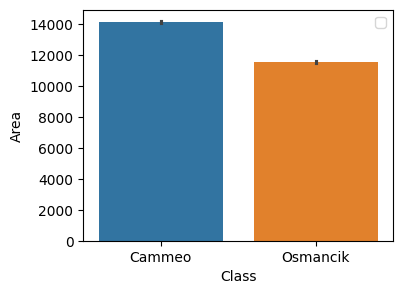

In [46]:
plt.figure(figsize = (4,3))
sns.barplot(x=y['Class'],y=X['Area'],hue = y['Class'])
plt.legend()
plt.show()

In [47]:
X['Area'].mean()

np.float64(12667.727559055118)

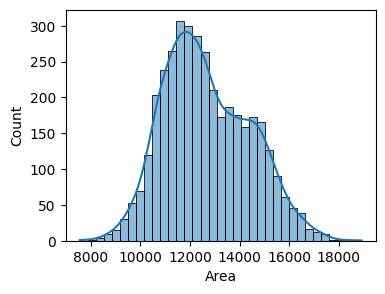

In [48]:
plt.figure(figsize = (4,3))
sns.histplot(X['Area'],kde=True)
plt.show()

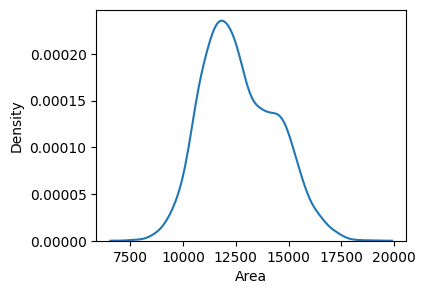

In [49]:
plt.figure(figsize = (4,3))
sns.kdeplot(X['Area'])
plt.show()

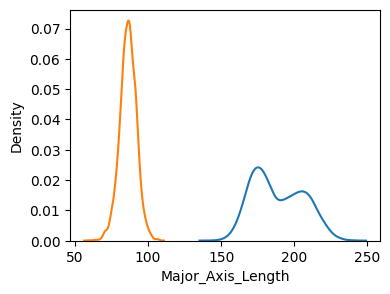

In [50]:
plt.figure(figsize = (4,3))
sns.kdeplot(X['Major_Axis_Length'])
sns.kdeplot(X['Minor_Axis_Length'])
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
y['Class'] = lab_enc.fit_transform(y['Class'])

C:\Users\GrowTech\AppData\Local\Temp\ipykernel_6584\1248807617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = lab_enc.fit_transform(y['Class'])


In [52]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
3805,1
3806,1
3807,1
3808,1


In [53]:
# normalize 
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
X_scaled = st_scaler.fit_transform(X)
X_scaled

array([[ 1.47982953,  2.0043543 ,  2.34854657, ...,  2.01833746,
         1.49965944, -1.15292093],
       [ 1.14787029,  1.12585309,  0.98839042, ...,  0.41001813,
         1.19291767, -0.60207876],
       [ 1.13516924,  1.31721425,  1.45190846, ...,  1.21295648,
         1.12650386,  0.405611  ],
       ...,
       [-0.13320373, -0.32985087, -0.29824512, ..., -0.27509915,
        -0.17306812, -0.45573108],
       [-1.60825742, -1.74032002, -1.58097116, ..., -0.59882135,
        -1.60715621, -0.03716757],
       [-0.71225612, -1.39156604, -1.58754648, ..., -2.93916012,
        -0.76628981,  1.82594693]], shape=(3810, 7))

In [54]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_scaled,y)


# K nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

In [57]:
knn_pred = knn.predict(X_test)
knn_pred[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [58]:
y_test[:10]

,Class
1773,1
3615,1
1776,1
2484,1
2488,1
2690,1
629,0
3477,1
3301,1
3641,1


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,knn_pred)*100 

92.75970619097586

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,knn_pred)
cm


array([[385,  39],
       [ 30, 499]])

<Axes: >

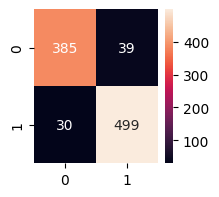

In [61]:
plt.figure(figsize=(2,2))
sns.heatmap(cm,annot=True,fmt = 'd')

In [63]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       424
           1       0.93      0.94      0.94       529

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953



# Support vector machine


In [64]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

C:\Users\GrowTech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [65]:
svm_pred = svm.predict(X_test)
svm_pred[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [67]:
accuracy_score(svm_pred,y_test)*100

92.13011542497377

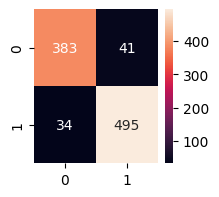

In [71]:
plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(y_test,svm_pred),
            annot=True,
            fmt = 'd')
plt.show()

# Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

C:\Users\GrowTech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [75]:
naive_pred = nb_clf.predict(X_test)

In [76]:
naive_pred[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [78]:
accuracy_score(naive_pred,y_test)*100

91.71038824763903

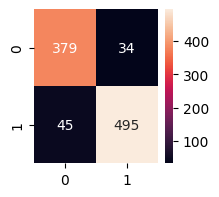

In [81]:
plt.figure(figsize = (2,2))
sns.heatmap(confusion_matrix(naive_pred,y_test),
            annot = True,
            fmt = 'd')
plt.show()